In [89]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Command to tell Python to actually display the graphs
%matplotlib inline

data = pd.read_csv("./backpain.csv")

data2 = data.copy().replace({"Abnormal": 1, "Normal": 0})
data2.head(10)


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,1


In [90]:
data2.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,-0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,-0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,0.100044


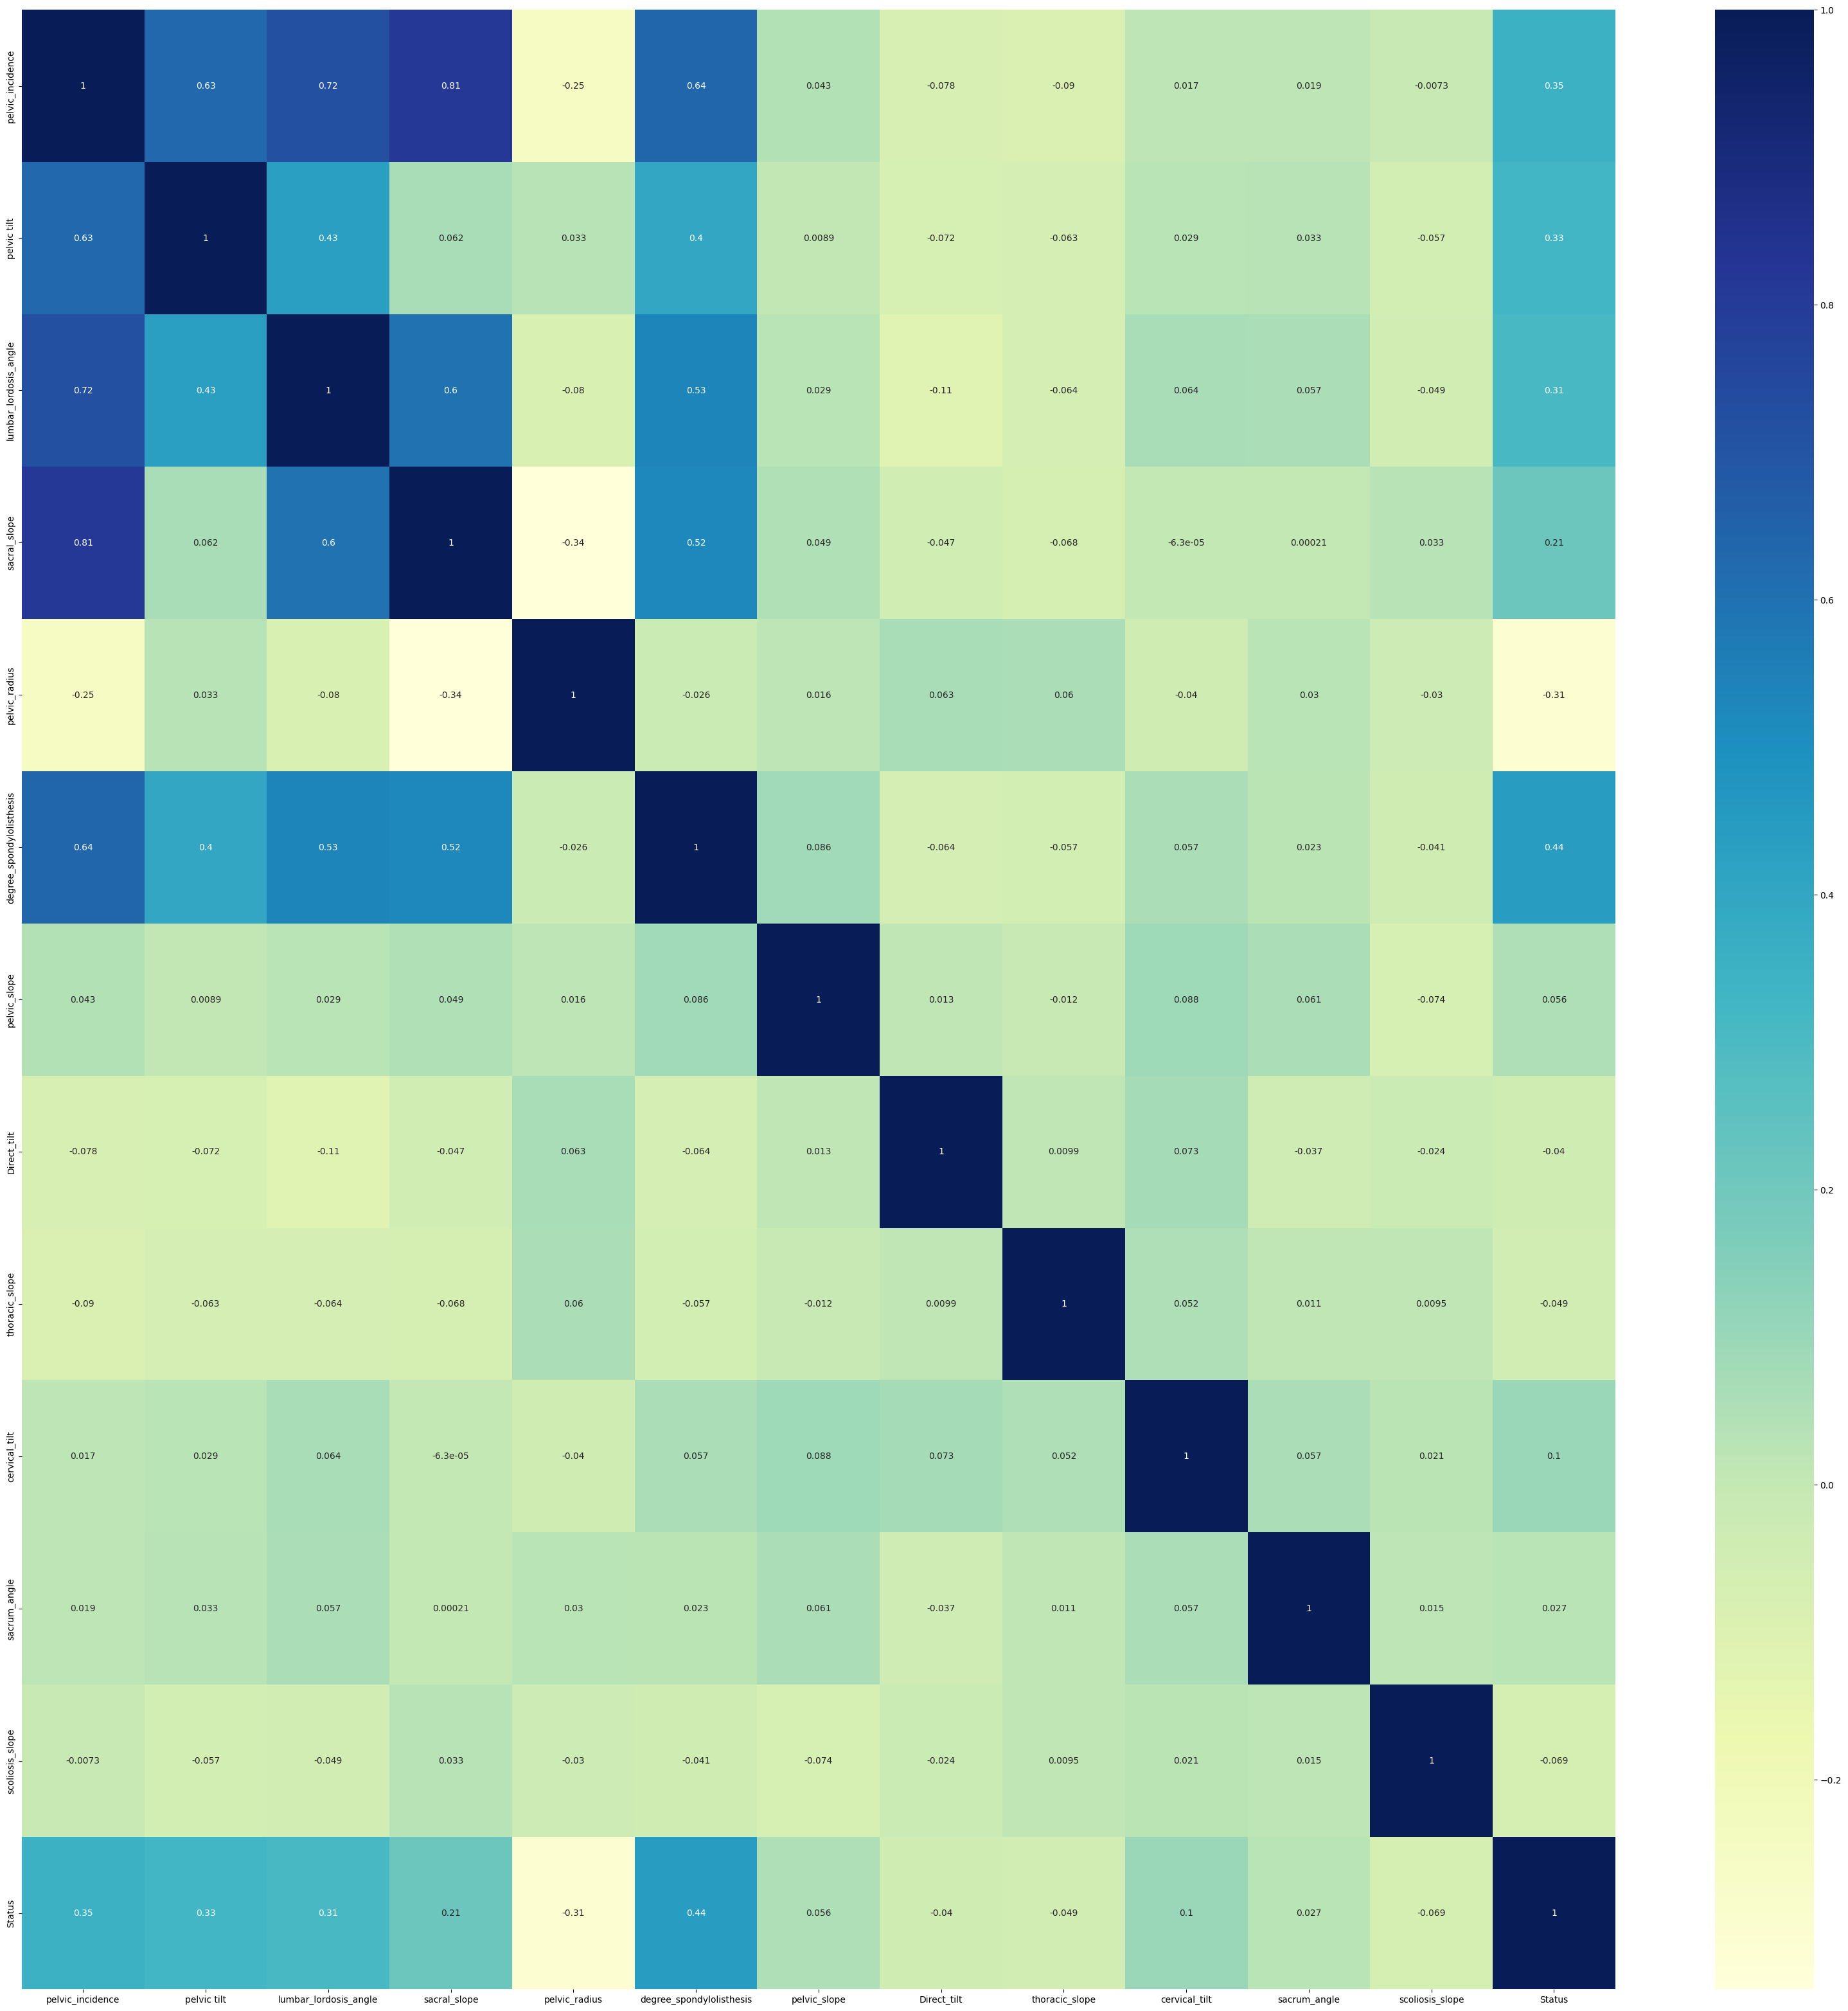

In [91]:
plt.figure(figsize=(40, 40))
sns.heatmap(data=data2.corr(), annot=True, cmap="YlGnBu")

In [92]:
X = data2.drop("Status", axis=1)
y = data2.pop("Status")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [96]:
y_train.value_counts(1)

Status
1    0.668203
0    0.331797
Name: proportion, dtype: float64

In [94]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [95]:
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.7634408602150538


In [102]:
from sklearn.model_selection import GridSearchCV


##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))


# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

In [103]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(X_train, y_train))
print("Accuracy on test set : ", estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.8525345622119815
Accuracy on test set :  0.7956989247311828
Recall on training set :  0.9172413793103448
Recall on test set :  0.8


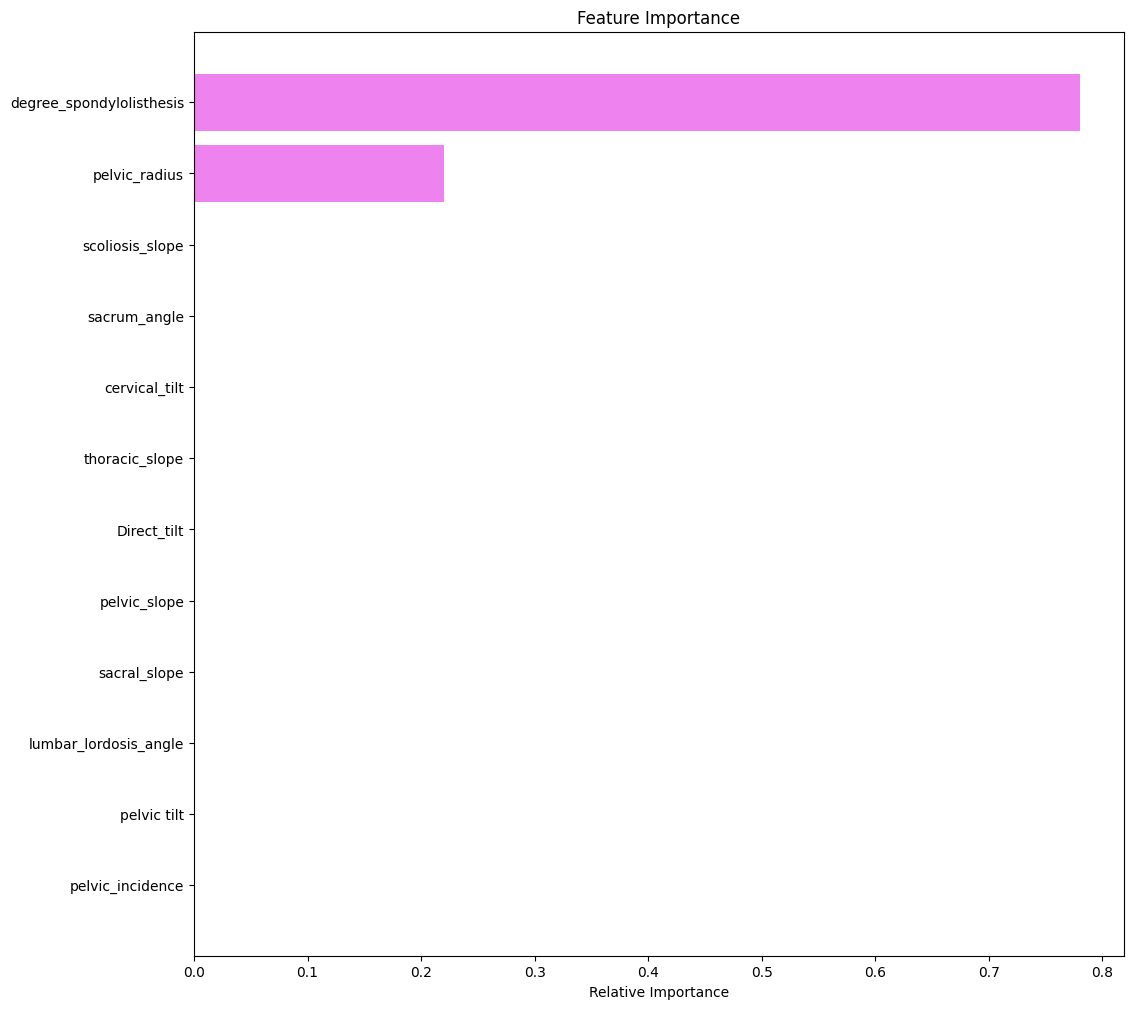

In [108]:
feature_names = list(X.columns)

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Answers


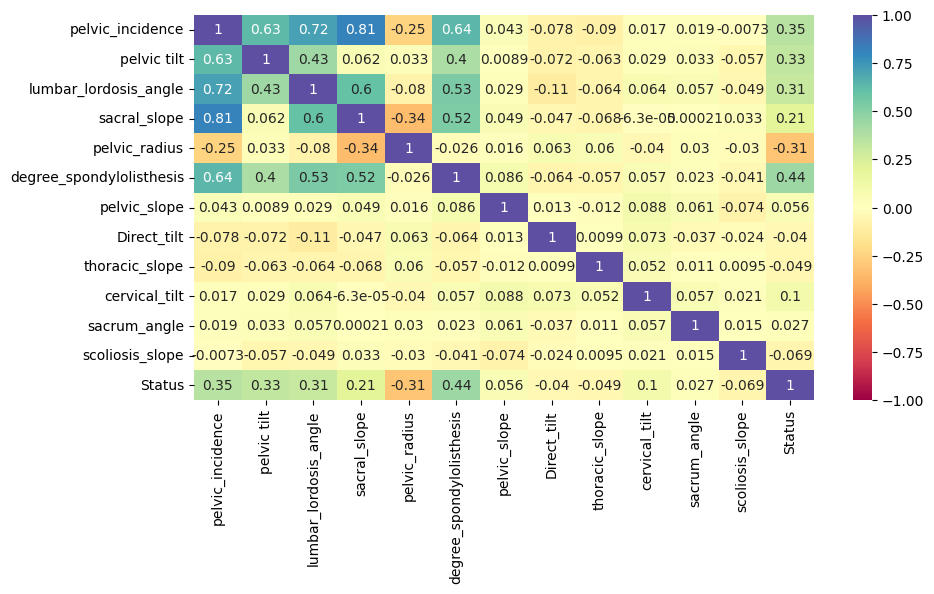

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data2 = data.copy().replace({"Abnormal": 1, "Normal": 0})
plt.figure(figsize=(10, 5))
sns.heatmap(data2.corr(), annot=True, vmax=1, vmin=-1, cmap="Spectral")

In [113]:
# Encoding the target variable
data["Status"] = data["Status"].apply(lambda x: 1 if x == "Abnormal" else 0)

# Splitting the Independent and dependent variabl
X = data.drop(["Status"], axis=1)
Y = data["Status"]

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

# Getting the percentages
y_train.value_counts(normalize=True)

Status
1    0.663594
0    0.336406
Name: proportion, dtype: float64

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

score_DT = []

for i in range(1, 9):
    dTree = DecisionTreeClassifier(max_depth=i, criterion="gini", random_state=1)
    dTree.fit(X_train, y_train)
    pred = dTree.predict(X_train)
    case = {"Depth": i, "Recall": recall_score(y_train, pred)}
    score_DT.append(case)

print(score_DT)

[{'Depth': 1, 'Recall': 0.6875}, {'Depth': 2, 'Recall': 0.8888888888888888}, {'Depth': 3, 'Recall': 0.8888888888888888}, {'Depth': 4, 'Recall': 0.9583333333333334}, {'Depth': 5, 'Recall': 0.9652777777777778}, {'Depth': 6, 'Recall': 0.9930555555555556}, {'Depth': 7, 'Recall': 0.9861111111111112}, {'Depth': 8, 'Recall': 1.0}]


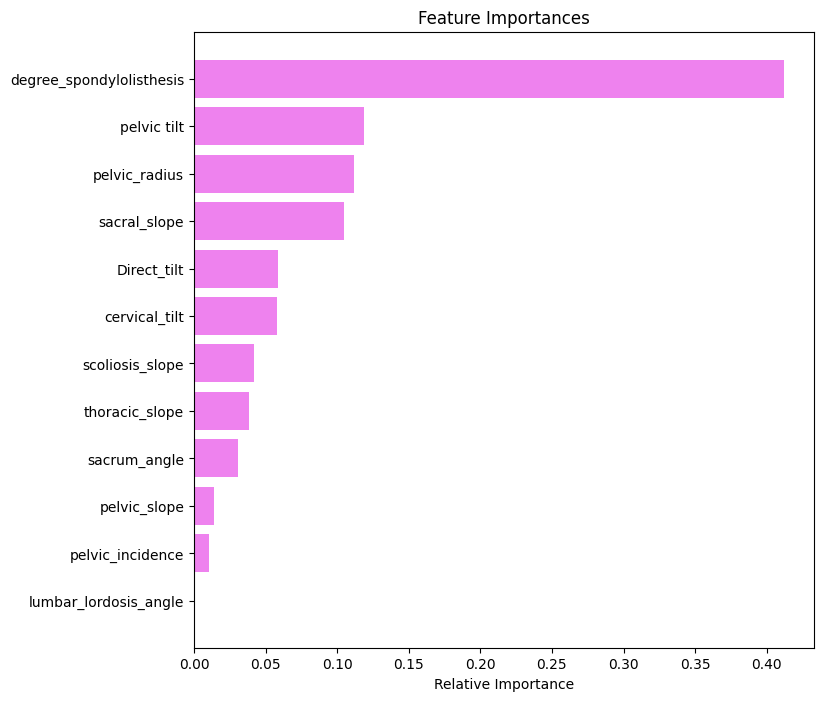

In [117]:
# importance of features in the tree building
feature_names = list(X_train.columns)

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [119]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)


# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring="recall", cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

In [122]:
# Training decision tree with default parameters
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

# Tuned model
estimator.fit(X_train, y_train)

# Predicting on the test set
y_pred_test1 = model.predict(X_test)
y_pred_test2 = estimator.predict(X_test)

# Checking model performance of Decision Tree with default parameters
print('recall_default_parameter', recall_score(y_test,y_pred_test1))
print('F1_default_parameter', metrics.f1_score(y_test,y_pred_test1))
print('*'* 50)

# Checking model performance of tunedDecision Tree
print('recall_tuned_parameter', recall_score(y_test,y_pred_test2))
print('F1_tuned_parameter', metrics.f1_score(y_test,y_pred_test2))

recall_default_parameter 0.7878787878787878
F1_default_parameter 0.832
**************************************************
recall_tuned_parameter 0.803030303030303
F1_tuned_parameter 0.8153846153846153
